# Topic : Mobile Price Prediction
In this project we are going to be building a model to predict the price of mobile phone based on certain parameters.

# Step 1 : Data Collection

The data already presents in Kaggle.

Reference :/kaggle/input/mobile-price-prediction-dataset/Mobile Price Prediction Datatset.csv"

# Step 2 : Importing Libraries

### Importing the required libraries for this project.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Step 2 : Data Preprocessing

### This process involves cleaning the data to make it ready for the use of ML Algorithms.

### To clean the data in various steps are taken such as,
    
-  Removing outliers.
-  Filling missing values.
-  Removing irrelevant fields.

In [5]:
data = pd.read_csv("Mobile Price Prediction Datatset.csv")

In [8]:
data.head()

,Unnamed: 0,Brand me,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
0,0,"LG V30+ (Black, 128 )",4.3,4.0,128.0,6.00,48,13.0,4000,24999
1,1,I Kall K11,3.4,6.0,64.0,4.50,48,12.0,4000,15999
2,2,Nokia 105 ss,4.3,4.0,4.0,4.50,64,16.0,4000,15000
3,3,"Samsung Galaxy A50 (White, 64 )",4.4,6.0,64.0,6.40,48,15.0,3800,18999
4,4,"POCO F1 (Steel Blue, 128 )",4.5,6.0,128.0,6.18,35,15.0,3800,18999


In [11]:
data.shape

(836, 10)

### Removing the unwanted columns Unnamed and Brand me

In [13]:
data.drop(['Unnamed: 0','Brand me'],axis=1,inplace=True)
data.head()

,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
0,4.3,4.0,128.0,6.00,48,13.0,4000,24999
1,3.4,6.0,64.0,4.50,48,12.0,4000,15999
2,4.3,4.0,4.0,4.50,64,16.0,4000,15000
3,4.4,6.0,64.0,6.40,48,15.0,3800,18999
4,4.5,6.0,128.0,6.18,35,15.0,3800,18999


### Relationship between Mobile_Size and Price

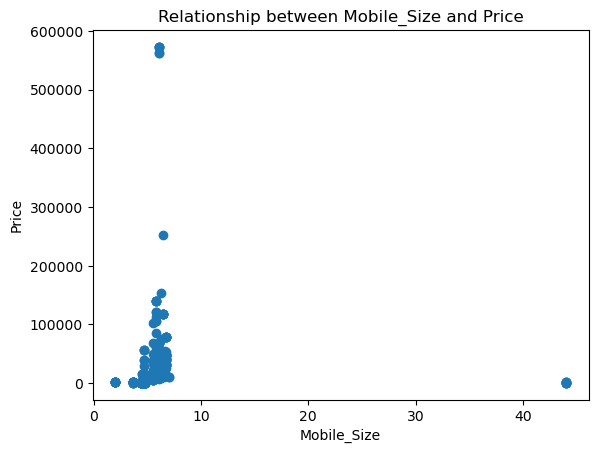

In [15]:
plt.scatter(data['Mobile_Size'],data['Price'])
plt.xlabel('Mobile_Size')
plt.ylabel('Price')
plt.title('Relationship between Mobile_Size and Price')
plt.show()

###### That the above visual gives that there are some outliers when it comes to mobile size.
###### We could visualize that mobile sizes are less than 10  and above 3.

### Removing Outliers

In [18]:
data = data[(data['Mobile_Size'] < 10) | (data['Mobile_Size'] > 3)]

In [20]:
data.shape

(834, 8)

In [22]:
data.head()

,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
0,4.3,4.0,128.0,6.00,48,13.0,4000,24999
1,3.4,6.0,64.0,4.50,48,12.0,4000,15999
2,4.3,4.0,4.0,4.50,64,16.0,4000,15000
3,4.4,6.0,64.0,6.40,48,15.0,3800,18999
4,4.5,6.0,128.0,6.18,35,15.0,3800,18999


### Relationship between Battery_Power and Price

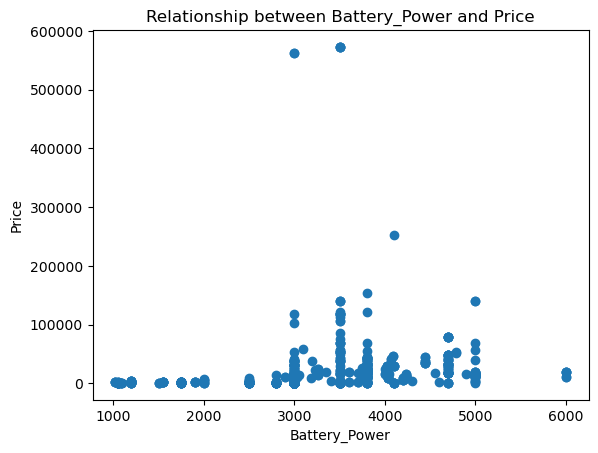

In [24]:
plt.scatter(data['Battery_Power'],data['Price'])
plt.xlabel('Battery_Power')
plt.ylabel('Price')
plt.title("Relationship between Battery_Power and Price")
plt.show()

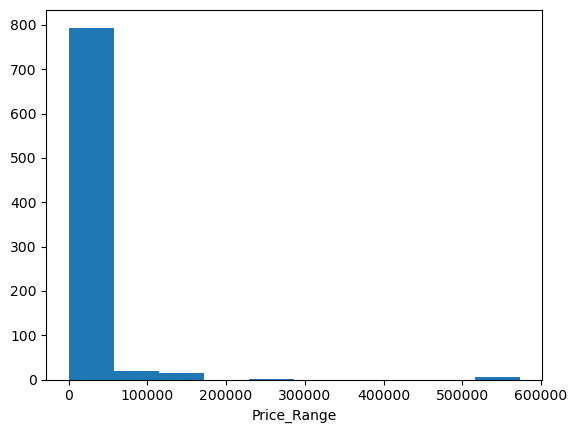

In [26]:
plt.hist(data['Price'])
plt.xlabel("Price_Range")
plt.show()

###### from the above visual we can come to understand that any price above 250,000 is an outlier.

In [29]:
data[data['Price'] > 250000]

,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
35,4.6,12.0,128.0,6.10,35,7.0,3500,573000
115,4.6,12.0,64.0,6.10,35,7.0,3500,573000
191,4.5,8.0,128.0,6.44,48,13.0,4100,253000
437,4.6,8.0,128.0,6.10,48,12.0,3000,563000
454,4.6,12.0,64.0,6.10,35,7.0,3500,573000
500,4.6,12.0,64.0,6.10,35,7.0,3500,573000
774,4.6,8.0,128.0,6.10,48,12.0,3000,563000


### Removing Outliers

In [32]:
data = data[data['Price'] < 250000]

In [34]:
data.shape

(827, 8)

### Relationship between Selfi_Cam and Price

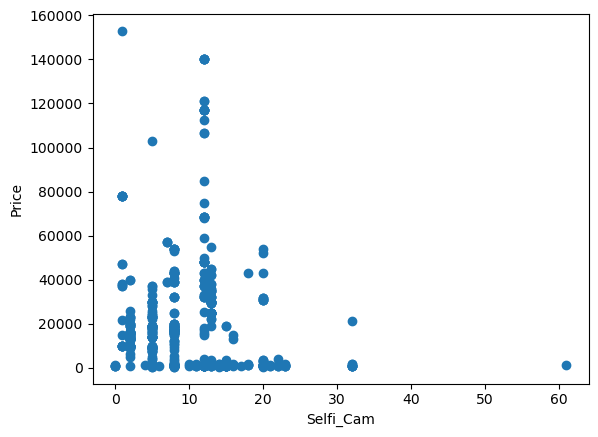

In [36]:
plt.scatter(data['Selfi_Cam'],data['Price'])
plt.xlabel('Selfi_Cam')
plt.ylabel('Price')
plt.show()

In [38]:
data[data['Selfi_Cam'] > 30]

,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
24,NaN,6.0,32.0,4.50,64,32.0,3000,649
83,NaN,6.0,32.0,4.54,48,32.0,1900,1570
211,4.2,8.0,64.0,4.77,48,32.0,3000,749
228,4.0,6.0,32.0,4.50,38,32.0,1750,999
229,3.9,8.0,64.0,4.54,64,32.0,2500,1710
253,4.0,6.0,32.0,4.50,48,32.0,3500,998
444,4.2,6.0,32.0,4.54,48,61.0,1750,1390
447,4.5,6.0,128.0,6.39,48,32.0,3000,21099
556,3.8,6.0,32.0,4.40,48,32.0,3800,930
787,NaN,6.0,32.0,4.50,64,32.0,3000,649


In [40]:
data.shape

(827, 8)

As we notice that Selfie_Cam column has many Null values, so we need to fill that

before removing the outliers if not we might loose a large part of the data set.

In [43]:
data.isna().sum()

Ratings           31
RAM                7
ROM                3
Mobile_Size        0
Primary_Cam        0
Selfi_Cam        267
Battery_Power      0
Price              0
dtype: int64

In [44]:
data['Selfi_Cam'] = data['Selfi_Cam'].fillna(data['Selfi_Cam'].median())

In [47]:
data.isna().sum()

Ratings          31
RAM               7
ROM               3
Mobile_Size       0
Primary_Cam       0
Selfi_Cam         0
Battery_Power     0
Price             0
dtype: int64

### Removing the outliers

In [49]:
data = data[data['Selfi_Cam'] < 30]

In [51]:
data.shape

(817, 8)

### Relationship between RAM and Price

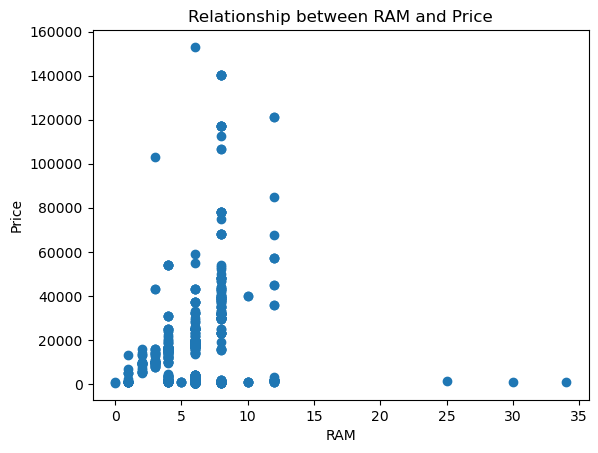

In [54]:
plt.scatter(data['RAM'],data["Price"])
plt.xlabel("RAM")
plt.ylabel('Price')
plt.title('Relationship between RAM and Price')
plt.show()

That the above visual shows that there are some outliers because that as much as the RAM is high, the price seems to be too low which mean there was an error in
the column during input so we have to remove this column with prize less than 20,000 but the RAM is greather than 16GB.

In [56]:
data[data['RAM']>16]

,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
165,3.8,25.0,25.0,4.54,48,8.0,3000,1199
190,4.0,30.0,0.0,4.50,64,8.0,3500,799
205,3.9,34.0,64.0,4.50,48,21.0,3000,955


### Removing the Outliers

In [58]:
data = data[data['RAM'] < 16]

In [60]:
data.shape

(807, 8)

### Relationship between ROM and Price

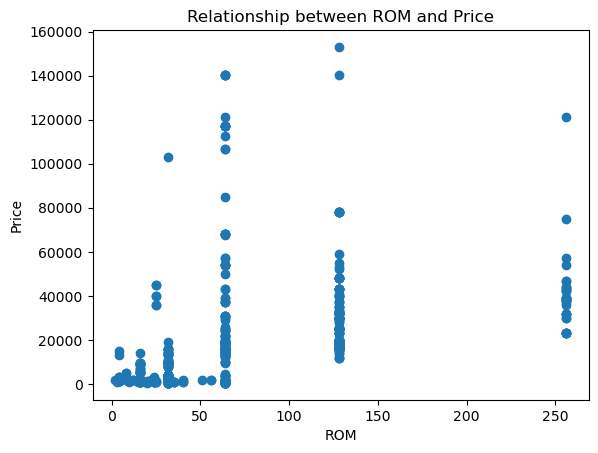

In [62]:
plt.scatter(data['ROM'],data['Price'])
plt.xlabel('ROM')
plt.ylabel('Price')
plt.title('Relationship between ROM and Price')
plt.show()

### Checking the Null Values in ROM

In [64]:
data.isna().sum()

Ratings          28
RAM               0
ROM               3
Mobile_Size       0
Primary_Cam       0
Selfi_Cam         0
Battery_Power     0
Price             0
dtype: int64

### Filling the Null Values using Mode

In [66]:
data['ROM'] = data['ROM'].fillna(data['ROM'].mode()[0])
data['ROM'].isna().sum()

0

### Relationship between Ratings and Price

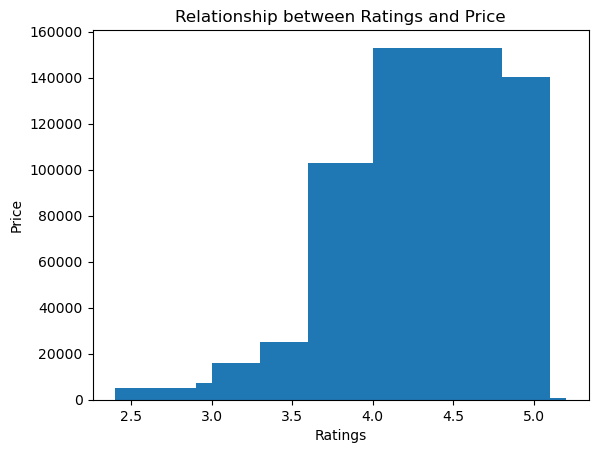

In [68]:
plt.bar(data['Ratings'],data['Price'])
plt.xlabel('Ratings')
plt.ylabel('Price')
plt.title('Relationship between Ratings and Price')
plt.show()

### Checking the Null Values in Ratings

In [70]:
data.isna().sum()

Ratings          28
RAM               0
ROM               0
Mobile_Size       0
Primary_Cam       0
Selfi_Cam         0
Battery_Power     0
Price             0
dtype: int64

### Filling the Null Values using Mode

In [72]:
data['Ratings'] = data['Ratings'].fillna(data['Ratings'].mode()[0])
data['Ratings'].isna().sum()

0

In [74]:
data.isna().sum()

Ratings          0
RAM              0
ROM              0
Mobile_Size      0
Primary_Cam      0
Selfi_Cam        0
Battery_Power    0
Price            0
dtype: int64

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 807 entries, 0 to 835
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Ratings        807 non-null    float64
 1   RAM            807 non-null    float64
 2   ROM            807 non-null    float64
 3   Mobile_Size    807 non-null    float64
 4   Primary_Cam    807 non-null    int64  
 5   Selfi_Cam      807 non-null    float64
 6   Battery_Power  807 non-null    int64  
 7   Price          807 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 56.7 KB


All the columns are in float or int values and there are no Null values. We have removed all the outliers so the data is clean and now the data is ready for the ML Project.

# Step 3 : Model Selection

### Since we are trying to predict the Mobile Price , we need to use Regression models as they are good for predicting continuous variable

- Linear Regression
- Random Forest Regressor 
- Gradien Boosting Regressor

### Setting the Random Seed 

In [78]:
np.random.seed(52)

# Step 4 : Model Trainng

### In this session we train the model using above mentioned ML algorithms

# 4.1 Spliting the data into X and Y Variables

### Spliting the data into feature(x) and target(y)

In [80]:
X = data.drop('Price',axis=1)
X.head()

,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power
0,4.3,4.0,128.0,6.00,48,13.0,4000
1,3.4,6.0,64.0,4.50,48,12.0,4000
2,4.3,4.0,4.0,4.50,64,16.0,4000
3,4.4,6.0,64.0,6.40,48,15.0,3800
4,4.5,6.0,128.0,6.18,35,15.0,3800


In [82]:
y = data['Price']
y.head()

0    24999
1    15999
2    15000
3    18999
4    18999
Name: Price, dtype: int64

# 4.2 Spliting the data by using train_test_split

In [84]:
from sklearn.model_selection import train_test_split

In [86]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [88]:
print(f'X_train : {X_train.shape}, X_test : {X_test.shape}, y_train : {y_train.shape}, y_test : {y_test.shape}')

X_train : (645, 7), X_test : (162, 7), y_train : (645,), y_test : (162,)


# 4.3 Linear Regression

In [90]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [93]:
y_pred = lr.predict(X_test)

### Linear Regression Evalutaion in step 5.1

# 4.4 Random Forest Regressor

In [95]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [97]:
y_pred1 = rf.predict(X_test)

### Random Forest Regressor Evalutaion in step 5.2

# 4.5 Gradient Boosting Regressor

In [99]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(X_train,y_train)

GradientBoostingRegressor()

In [101]:
y_pred2 = gbr.predict(X_test)

### Gradient Boosting Regressor Evalutaion in step 5.3

# Step 5 : Evaluation

### In this process we evaluate the models using some evaluation methods to see how well they performed

- Mean Absolute Error
- Mean Squared Error
- R2 Score

# 5.1 Linear Regression Evaluation

In [103]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mae = mean_absolute_error(y_pred,y_test)
mse = mean_squared_error(y_pred,y_test)
r2 = r2_score(y_pred,y_test)

print('mean_absolute_error :',  mae)
print('mean_squared_error :',  mse)
print('R2 Score :',  r2)

mean_absolute_error : 10002.506294197372
mean_squared_error : 348827586.563748
R2 Score : -0.45335632612490206


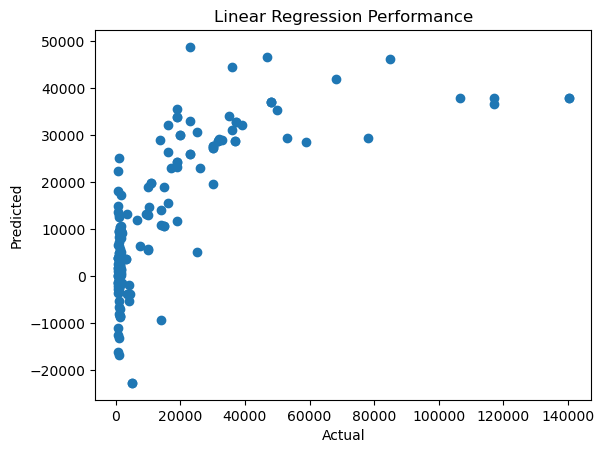

In [105]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression Performance')
plt.show()

# 5.2 Random Forest Regressor Evaluation

In [107]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mae = mean_absolute_error(y_test,y_pred1)
mse = mean_squared_error(y_test,y_pred1)
r2 = r2_score(y_test,y_pred1)


print('mean_absolute_error :',mae)
print('mean_squared_error :',mse)
print('R2 Score :',r2)
print('training score :',rf.score(X_train,y_train))
print('testing score :',rf.score(X_test,y_test))

mean_absolute_error : 2302.5972230189227
mean_squared_error : 32446143.612913992
R2 Score : 0.9503019576454835
training score : 0.9805009611764015
testing score : 0.9503019576454835


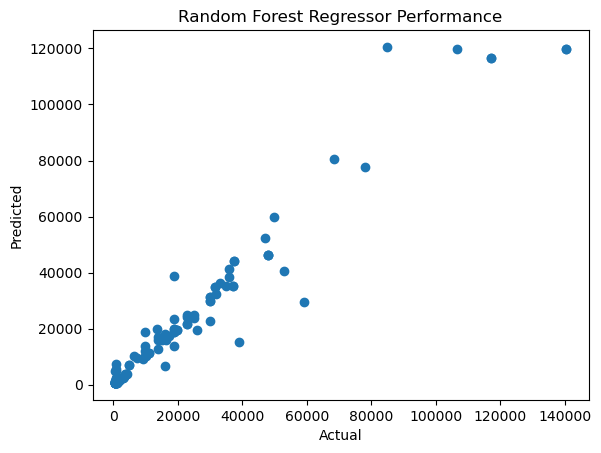

In [109]:
plt.scatter(y_test,y_pred1)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest Regressor Performance')
plt.show()

# 5.3 Gradient Boosting Regressor Evaluation

In [111]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mae = mean_absolute_error(y_test,y_pred2)
mse = mean_squared_error(y_test,y_pred2)
r2 = r2_score(y_test,y_pred2)

print('mean_absolute_error :',mae)
print('mean_squared_error :',mse)
print('R2 Score :',r2)
print('traing score :',gbr.score(X_train,y_train))
print('testing score :',gbr.score(X_test,y_test))

mean_absolute_error : 3236.9086963409977
mean_squared_error : 46171677.18577541
R2 Score : 0.9292784376555483
traing score : 0.9505104185567477
testing score : 0.9292784376555483


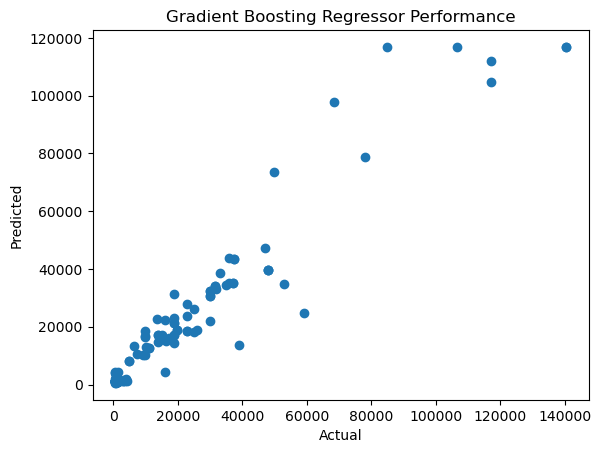

In [113]:
plt.scatter(y_test,y_pred2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Gradient Boosting Regressor Performance')
plt.show()

# conclusion

### From the above we can see that the first algorithm didn't do too well as its peformance is less than 50% but the other two Random Forest Regressor and Gradient boost Regressor did well and above 90%